<a href="https://colab.research.google.com/github/SobiaKhan-lab/Portfolio/blob/main/BigQuery_bquxjob_2171e422_186c3c8c514.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'cloudcomputing-379421' # Project ID inserted based on the query results selected to explore
location = 'northamerica-northeast2' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=cloudcomputing-379421:northamerica-northeast2:bquxjob_2171e422_186c3c8c514)
back to BigQuery to edit the query within the BigQuery user interface.

In [3]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2171e422_186c3c8c514') # Job ID inserted based on the query results selected to explore
print(job.query)

Select OwnerSplitAddress, OwnerSplitState, OwnerSplitCity From `cloudcomputing-379421.DBNashvilleHousing.BQNashvilleHousingData`;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2171e422_186c3c8c514') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,OwnerSplitAddress,OwnerSplitState,OwnerSplitCity
0,None,None,None
1,None,None,None
2,None,None,None
3,0 BRICK CHURCH PIKE,TN,GOODLETTSVILLE
4,0 BRICK CHURCH PIKE,TN,GOODLETTSVILLE
...,...,...,...
56475,4121 FRANKLIN PIKE,TN,NASHVILLE
56476,4410 TRUXTON PL,TN,NASHVILLE
56477,2430 BEAR RD,TN,NASHVILLE
56478,2430 BEAR RD,TN,NASHVILLE


In [2]:
sheet_id = "1vXvp4phwsjHq385SIzzat-lReeXCVRjouEhc8U_efv4"
worksheet_name = "Nashville Housing Data - Cleaned"

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [5]:
results.describe()

,OwnerSplitAddress,OwnerSplitState,OwnerSplitCity
count,26015,26015,26015
unique,22326,1,12
top,0 MCKINLEY ST,TN,NASHVILLE
freq,9,26015,20701


In [3]:
!pip install --upgrade gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 4.0 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/gcpdrive')

Mounted at /content/gcpdrive


In [6]:
from google.colab import auth
auth.authenticate_user()


In [7]:
import gspread

In [8]:
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
sh = gc.open_by_key(sheet_id)
sh.worksheets()
worksheet = sh.worksheet(worksheet_name)
worksheet.get_all_records()


[{'UniqueID': 4514,
  'ParcelID': '018 00 0 087.00',
  'LandUse': 'VACANT RURAL LAND',
  'PropertyAddress': '0  BRICK CHURCH PIKE, GOODLETTSVILLE',
  'SaleDate': '2013-06-28',
  'SalePrice': 250000,
  'LegalReference': '20130709-0070947',
  'SoldAsVacant': 'FALSE',
  'OwnerName': 'BUCHANAN, DONALD W. & SANDRA R.',
  'OwnerAddress': '0  BRICK CHURCH PIKE, GOODLETTSVILLE, TN',
  'Acreage': 8.13,
  'TaxDistrict': 'CITY OF GOODLETTSVILLE',
  'LandValue': 48800,
  'BuildingValue': 0,
  'TotalValue': 48800,
  'YearBuilt': '',
  'Bedrooms': '',
  'FullBath': '',
  'HalfBath': '',
  'PropertySplitAddress': '0  BRICK CHURCH PIKE',
  'PropertySplitCity': 'GOODLETTSVILLE',
  'OwnerSplitAddress': '0  BRICK CHURCH PIKE',
  'OwnerSplitCity': 'GOODLETTSVILLE',
  'OwnerSplitState': 'TN'},
 {'UniqueID': 4515,
  'ParcelID': '018 00 0 096.00',
  'LandUse': 'VACANT RES LAND',
  'PropertyAddress': '0  BRICK CHURCH PIKE, GOODLETTSVILLE',
  'SaleDate': '2013-06-28',
  'SalePrice': 250000,
  'LegalReference':

In [9]:
df = pd.DataFrame(worksheet.get_all_records())

In [10]:
df.columns

Index(['UniqueID', 'ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'LegalReference', 'SoldAsVacant', 'OwnerName',
       'OwnerAddress', 'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath',
       'PropertySplitAddress', 'PropertySplitCity', 'OwnerSplitAddress',
       'OwnerSplitCity', 'OwnerSplitState'],
      dtype='object')

<AxesSubplot:>

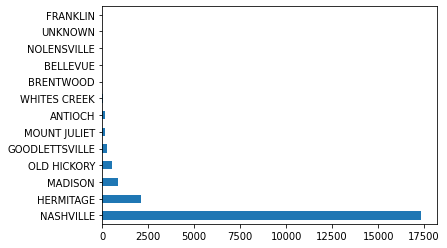

In [11]:
df['Year'] = df['SaleDate'].str[:4]
df['Month'] = df['SaleDate'].str[5:7]
df['Date']= df['SaleDate'].str[8:10]
df['PropertySplitCity'].value_counts().plot(kind='barh')